<a href="https://colab.research.google.com/github/Sulaiman29/IntelliBrief/blob/main/BDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IntelliBrief News Summarisation System**

**Installing the required dependencies:**

In [1]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313501 sha256=2e368cd2277fbbfd96d0aaccf611dee28060cfd6b0155959b32d52a07c212961
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [3]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=cdaa8127b2735671fdf7f2086170e20ec5e754c9b1c2948d77717c4523156c72
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


**Importing important Libraries:**

In [4]:
import fasttext
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
from scipy import spatial
from statistics import mean
from math import ceil
from rouge_score import rouge_scorer
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Mounting the Google drive, to keep our trained models (Easy to use)**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/

/content/drive/My Drive


**After training and testing using our saved models to work in a clusterd form**

In [7]:
model_skipgram = fasttext.load_model("models/model_skipgram.bin")
model_cbow = fasttext.load_model("models/model_cbow.bin")

ValueError: models/model_skipgram.bin cannot be opened for loading!

**Initiating the task:**

In [9]:
from IPython.display import Image

# Provide the path to your PNG file
image_path = '/content/473172_1_En_16_Fig1_HTML.png'

# Display the image
#Image(filename=image_path)


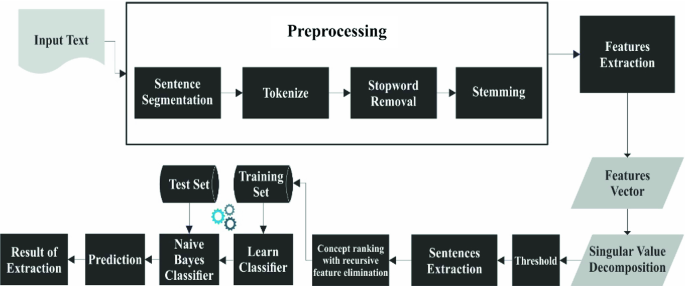

**Unzip the data into respective directory:**

In [11]:
!unzip -q /content/Dataset.zip -d /content/data

We begin with the assumption that our input stream is pre-processed, which allows us to apply the Naive Bayes algorithm effectively. We then elaborate the process further by performing feature extraction.

In [ ]:
#Naive baye's classifier:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules for Feature Extraction & Modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#Libraries for Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pylab import boxplot, text
import seaborn as sns
import joblib
import os
import glob

In [ ]:
print(f"Current working directory is: {os.getcwd()}")
dir = os.chdir("/content")
print(f'Changing directory to {os.getcwd()}')

In [ ]:
def load_data(folder_names, root_path):
    fileNames = [path + "/data/BBC News Summary/News Articles/" + folder + '/' + "*.txt"
        for path,folder in zip([root_path]*len(folder_names), folder_names)]
    #print(fileNames)
    #print("\n")
    doc_list = []
    tags = folder_names
    for docs in fileNames:
        #print(docs)
        doc = glob.glob(docs)#glob method iterates through all files and reads the text in documents in the folders
        for text in doc:
            with open(text, encoding="latin-1") as f:
                topic = docs.split('/')[len(docs.split('/'))-2]
                lines = f.readlines()
                heading = lines[0].strip()#stripping the text by spaces and using first element into heading
                body = ' '.join([l.strip() for l in lines[1:]])
                doc_list.append([topic,heading,body])
        print(f"Loading data from \033[1m{topic}\033[0m directory")
    print("\nEntire Data is loaded successfully")

    return doc_list

In [ ]:
folder_names = ['business','entertainment','politics','sport','tech']
docs = load_data(folder_names=folder_names,root_path=os.getcwd())

In [ ]:
docs = pd.DataFrame(docs, columns = ['Category','Heading','Article'])

In [ ]:
docs.head()

In [ ]:
docs['text_len']=docs.Heading.apply(len)
docs['headlines_len']=docs.Article.apply(len)

In [ ]:
docs['Category'].value_counts().plot.bar()

In [ ]:
docs.head()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(docs.text_len, ax=axes[0], color='blue')
sns.histplot(docs.headlines_len, ax=axes[1], color='red')

In [ ]:
tags_values = docs.Category.value_counts()
tags_values

In [ ]:
def plot_boxplot(df, varibale):
  fig1, ax1 = plt.subplots(figsize=(10,2))
  ax1.set_title(f'BoxPlot of {variable}', fontsize=18)
  values = list(df[variable].values)
  ax1.boxplot(values, vert=False, showfliers=False, widths = 0.6);

  bp_dict = boxplot(values, vert=False, showfliers=False, widths = 0.6)


  for line in bp_dict['medians']:
      # get position data for median line
      x, y = line.get_xydata()[1] # top of median line
      # overlay median value
      text(x, y+0.05, '%.1f' % x,
          horizontalalignment='center', fontsize=14) # draw above, centered

  for line in bp_dict['whiskers']:
      # get position data for median line
      x, y = line.get_xydata()[1] # top of median line
      # overlay median value
      text(x, y+0.3, '%.1f' % x,
          horizontalalignment='center', fontsize=14) # draw above, centered

  for line in bp_dict['boxes']:
      x, y = line.get_xydata()[0] # bottom of left line
      text(x,y-0.02, '%.1f' % x,
          horizontalalignment='center', # centered
          verticalalignment='top', fontsize=14)      # below
      x, y = line.get_xydata()[3] # bottom of right line
      text(x,y-0.02, '%.1f' % x,
          horizontalalignment='center', # centered
              verticalalignment='top', fontsize=14)      # below

  plt.xlabel(variable, fontsize=10)
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=8)
  plt.show()

In [ ]:
for variable in ['text_len','headlines_len']:
  plot_boxplot(docs, variable)

In [ ]:
#Creating a list of text belonging to individual category of articles

heading_sport = docs[docs["Category"]=='sport']["Heading"] #Extracting the headings of the
#print(heading_sport)
collapsed_heading_sport =heading_sport.str.cat(sep = ' ') #
#print(collapsed_heading_sport)

heading_business = docs[docs["Category"]=='business']["Heading"] #Extracting the headings
collapsed_heading_business =heading_business.str.cat(sep = ' ')

heading_politics = docs[docs["Category"]=='politics']["Heading"]
collapsed_heading_politics =heading_politics.str.cat(sep = ' ')

heading_tech = docs[docs["Category"]=='tech']["Heading"]
collapsed_heading_tech =heading_tech.str.cat(sep = ' ')

heading_entertainment = docs[docs["Category"]=='entertainment']["Heading"]
collapsed_heading_entertainment =heading_entertainment.str.cat(sep = ' ')

In [ ]:
#Creating List of Stopwords
stopwords = set(STOPWORDS)

In [ ]:
print('\033[1m'"\nSports"'\033[0m')
#Generate a Word Cloud for Sports
wordcloud = WordCloud(stopwords=stopwords, background_color='black', max_words=50).generate(collapsed_heading_sport)#Initializing the Word Cloud Class
#Display the generated Word cloud as image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


print('\033[1m'"\nBusiness"'\033[0m')
#Generate a Word Cloud for Business
wordcloud = WordCloud(stopwords=stopwords, background_color='orange', max_words=50).generate(collapsed_heading_business)#Initializing the Word Cloud Class
#Display the generated Word cloud as image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
"""
 Finally, the transformed data is fed into a
 Multinomial Naive Bayes classifier to predict the
 category or label of the input text.
"""
#Building pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()), #Apply the transformed data to Multinomial Naive Bayes Algo
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(docs['Heading'],docs['Category'],
                                                   random_state=42, test_size=0.2)
print(f"Size of input training data is {x_train.shape}")
print(f"Size of input test data is {x_test.shape}")
print(f"Size of output training data is {y_train.shape}")
print(f"Size of output test data is {y_test.shape}")

In [ ]:
model = clf.fit(x_train,y_train) #fit the clf pipeline to training data

In [ ]:
#Accuracy of the Naive Bayes Model
mdl_score = "{:.2f}".format(model.score(x_test,y_test) * 100)
print(f"The Accuracy of the Naive Bayes Classifier Model is {mdl_score}%")
print(f"\n{mdl_score}% of the times the model predicts the correct category for the news article")

In [ ]:
#Predicting on the test data
y_pred_NB = model.predict(x_test)
y_pred_NB[:5]


In [ ]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_pred_NB)
np.set_printoptions(precision=2)
cnf_mat


In [ ]:
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")

    print(cm)
#show data as image using plt.imshow
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
#ARANGE : returns evenly spaced values from the given interval
# and the advantage of numpy.arange() over the normal in-built range() function is that it allows us to generate sequences of numbers that are not integers
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')

    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'



In [ ]:
#Without Normalization
plt.figure()
plot_confusion_matrix(cnf_mat, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_mat,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()